<div>
<img sr c= "attachment:Billboard%20Hot%20100%20black.png" width = "350"/>
</div>

<div>
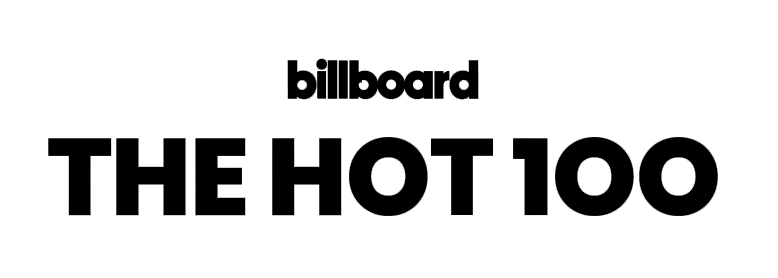
</div>

The **Billboard Hot 100** is a weekly chart that showcases the top 100 tracks in the USA based on sales (physical and digital), streaming and radio airplay. It debuted on August 4th, 1958 and considered the industry standard for hit songs. The data was acquired using **billboard.py**, a Python API for accessing music charts from Billboard.com.

The variables of interest are:
* **Date** - Date of the chart
* **Title** – Title of the track
* **Artist** – Name of the artist, as formatted on Billboard.com
* **Rank** – Track's current position on the chart
* **Peak** – Track's peak position on the chart as of the chart date
* **Weeks** – The number of weeks the track has been or was on the chart, including future dates (up until the present time)

### Import packages

In [1]:
from datetime import datetime, date
from math import ceil
import billboard as bb
import pandas as pd

### Calculate number of charts to retrieve

In [2]:
# To discover current chart date
current = bb.ChartData('hot-100', '2020-02-01')
current.date

# Convert to a date object
current = datetime.strptime(current.date, '%Y-%m-%d').date()

# Find out how many weeks of charts there should be
d1 = current
d2 = date(1958, 8, 1)
Hot100Weeks = ceil((d1 - d2).days/7)

print('{:,} weeks of Billboard Hot 100 charts'.format(Hot100Weeks))

3,210 weeks of Billboard Hot 100 charts


### Iterate over each week

In [ ]:
chart = bb.ChartData('hot-100', '2020-02-01')

chart_date = []
title = []
artist = []
rank = []
peak = []
weeks = []

for Week in range(Hot100Weeks):
    
    for Song in range(100):
        hit = chart[Song]
        
        try:
            chart_date.append(chart.date)
            title.append(hit.title)
            artist.append(hit.artist)
            rank.append(hit.rank)
            peak.append(hit.peakPos)
            weeks.append(hit.weeks)
        
        except:
            pass
        
    chart = bb.ChartData('hot-100', chart.previousDate)

### Create a dataframe

In [456]:
Hot100Complete = pd.DataFrame({
    'Date' : chart_date,
    'Title' : title,
    'Artist' : artist,
    'Rank' : rank,
    'Peak' : peak,
    'Weeks' : weeks
    }   
)

### Export to .csv

In [ ]:
Hot100Complete.to_csv('Hot100Complete.csv', index = False)